_______
<center>
  <h1 style="font-size: 36px; font-weight: bold">Car Price Prediction Project</h1>
</center>

_______

### Problem Description:

**A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:**

* **Which variables are significant in predicting the price of a car**
* **How well those variables describe the price of a car**
 
**Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.**

**Business Goal:**

**You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.**
__________

## Dataset: 
+ https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# 1. Loading and Preprocessing

In [2]:
df = pd.read_csv(r"C:\Users\admin\Downloads\CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.shape

(205, 26)

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
print("Missing values in each column:\n")
print(df.isnull().sum())

Missing values in each column:

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


* No missing values are here.

In [9]:
print("Duplicate values:")
print(df.duplicated().sum())

Duplicate values:
0


* No duplicate values.

In [10]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [12]:
df["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [13]:
df['symboling'] = df['symboling'].astype('object')

* Symboling typically refers to the car's risk or insurance risk factor. It is usually represented by integer values such as -1, 0, 1, 2, etc., where:
    + A higher value may indicate a higher risk (which can be related to factors like the car's performance, safety features, etc.).
* By converting symboling to object, you may be preparing the column for categorical encoding. This is likely to be useful when dealing with machine learning algorithms that need categorical variables to be in a specific format (e.g., using one-hot encoding or label encoding).

In [14]:
numerical_columns = list(df.select_dtypes(include=['float64', 'int64']).columns)
numerical_columns

['car_ID',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [15]:
categorical_columns=list(df.select_dtypes(include=['object']).columns)
categorical_columns

['symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [16]:
df=df.drop(columns=['car_ID'], axis=1)

* The column 'car_ID' seems irrelevant and might have no role in determining the target.

In [17]:
numerical_features = numerical_columns.copy()

In [18]:
numerical_features

['car_ID',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [19]:
len(numerical_features)

15

In [20]:
for col in categorical_columns:
    print(df[col].value_counts(),"\n")

symboling
0     67
1     54
2     32
3     27
-1    22
-2     3
Name: count, dtype: int64 

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64 

fueltype
gas       185
diesel     20
Name: count, dtype: int64 

aspiration
std      168
turbo     37
Name: count, dtype: int64 

doornumber
four    115
two      90
Name: count, dtype: int64 

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64 

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64 

enginelocation
front    202
rear       3
Name: count, dtype: int64 

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count

In [21]:
#Extracting Make from 'CarName'
df['make'] = df['CarName'].apply(lambda x: x.split(' ')[0])

* The column 'CarName' contains 147 unique values, which could increase the complexity of the project. The entries in 'CarName' appear to follow the format "make [space] model." By extracting the 'make' from the 'CarName' column, we can reduce the complexity while retaining valuable information about the car's brand.

In [22]:
df['make'].value_counts()

make
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [23]:
df.make.nunique()

28

In [24]:
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [25]:
#Correcting Misspelled Make Names and Replacing Aliases
df['make']=df['make'].replace(
    {'maxda':'mazda', 'porcshce':'porsche', 'Nissan':'nissan', 'toyouta':'toyota', 'vokswagen':'volkswagen', 'vw':'volkswagen'})

* The code corrects misspelled car brand names and replaces common aliases in the 'make' column, ensuring consistency and accuracy in the dataset. This cleaning step reduces data inconsistencies and improves the reliability of subsequent analysis and model performance.

In [26]:
df.make.nunique()

22

In [27]:
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [28]:
#Dropping 'CarName' from dataset
df=df.drop(columns=['CarName'], axis=1)

In [29]:
#removing CarName from categorical features list
categorical_features = categorical_columns.copy()
categorical_features.remove('CarName')

#adding make to feature list
categorical_features.append('make')

* The code drops the 'CarName' column from the dataset to reduce complexity, as it was likely split into 'make' and 'model'. It also updates the list of categorical features by removing 'CarName' and adding 'make' for further analysis or encoding.

In [30]:
#Updated Dataset

In [31]:
df.shape

(205, 25)

In [32]:
numerical_features

['car_ID',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [33]:
len(numerical_features)

15

In [34]:
categorical_features

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'make']

In [35]:
len(categorical_features)

11

# DATA EXPLORATION (EDA)

## Target - Price

In [36]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

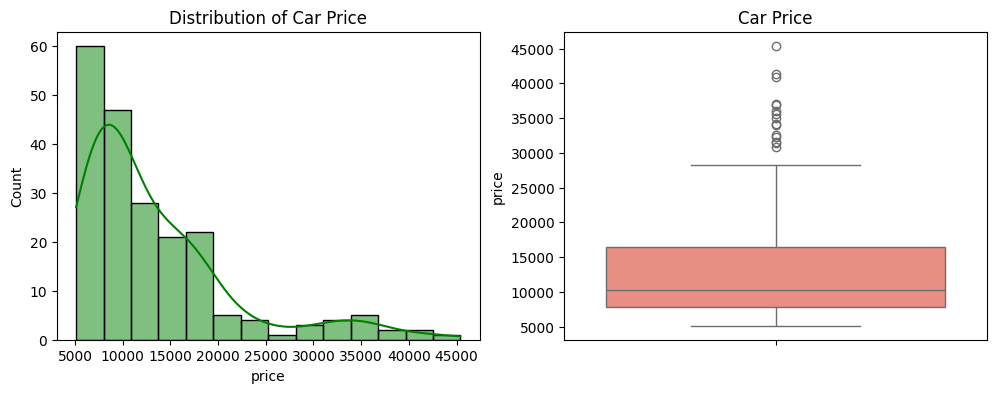

In [37]:
plt.figure(figsize=(12,4))

#plotting histogram - price distribution
plt.subplot(1,2,1)
sns.histplot(data=df, x='price', kde=True, color='green')
plt.title('Distribution of Car Price')

#boxplot - price distribution
plt.subplot(1,2,2)
sns.boxplot(data=df, y='price', color='salmon')
plt.title('Car Price')

plt.show()

In [38]:
print(f'Skewness: {df['price'].skew()}\nKurtosis:{df['price'].kurt()}')

Skewness: 1.7776781560914454
Kurtosis:3.051647871396399


**Note:**
* The plot or distribution of car price seems highly right skewed
* Most prices in the dataset are below 20000

In [39]:
df['price'] = np.sqrt(df['price'])
print(f"Skewness of 'price' after Square Root Transformation: {df['price'].skew()}")

Skewness of 'price' after Square Root Transformation: 1.2046203000198417


In [40]:
def visualize_numerical(df, feature):
    plt.figure(figsize=(12,4))

    #histogram
    plt.subplot(1,2,1)
    sns.histplot(data=df, x=feature, kde=True, color='green')
    plt.title(f'Distribution of {feature}')
    
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=df, y=feature,color='salmon')
    plt.title(f'{feature}')
    
    plt.show()

In [41]:
numerical_features

['car_ID',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [42]:
numerical_features = [col for col in numerical_features if col != 'car_ID']
print(numerical_features)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


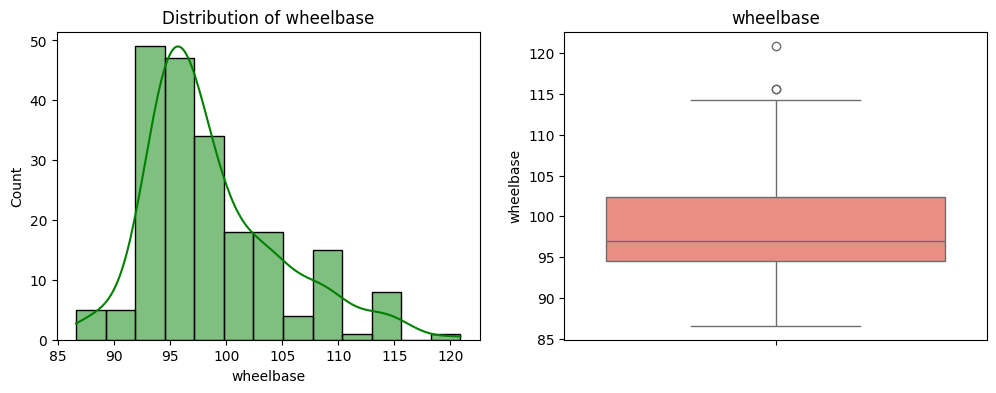

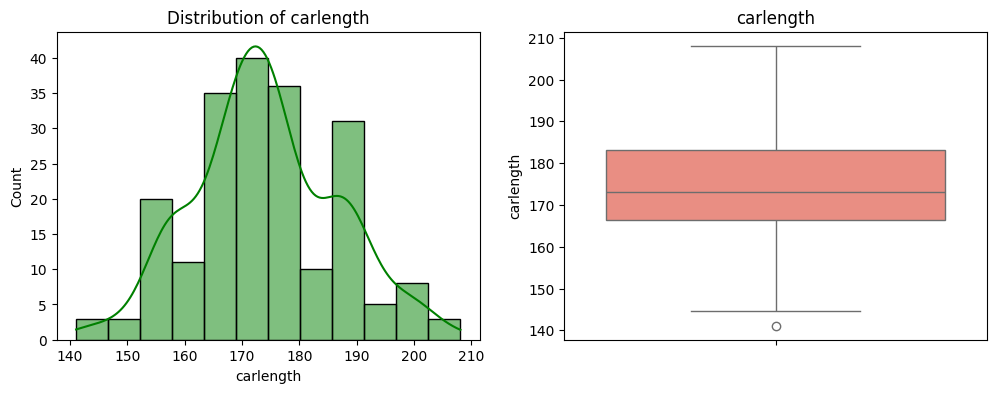

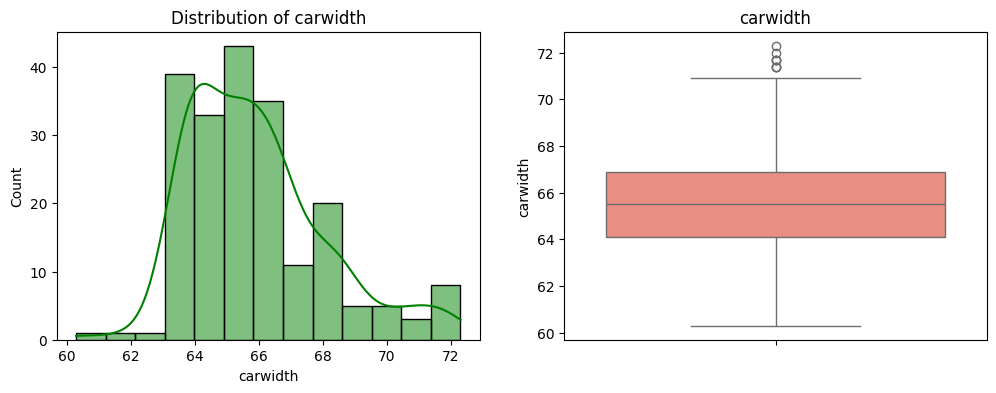

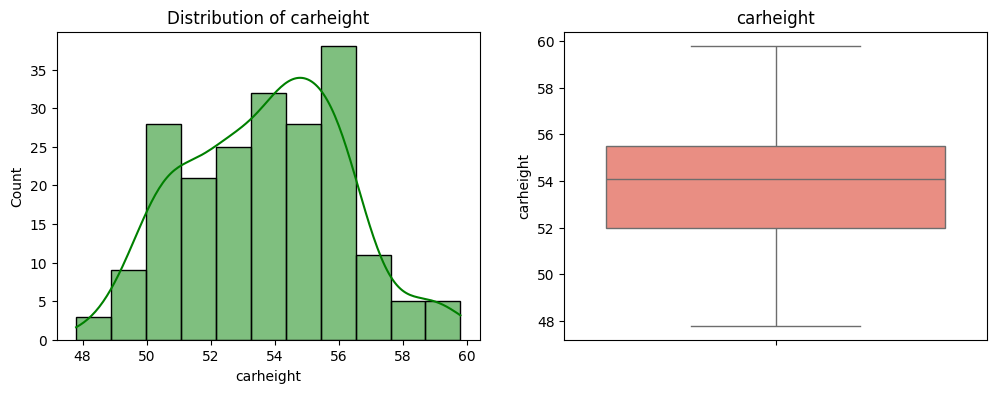

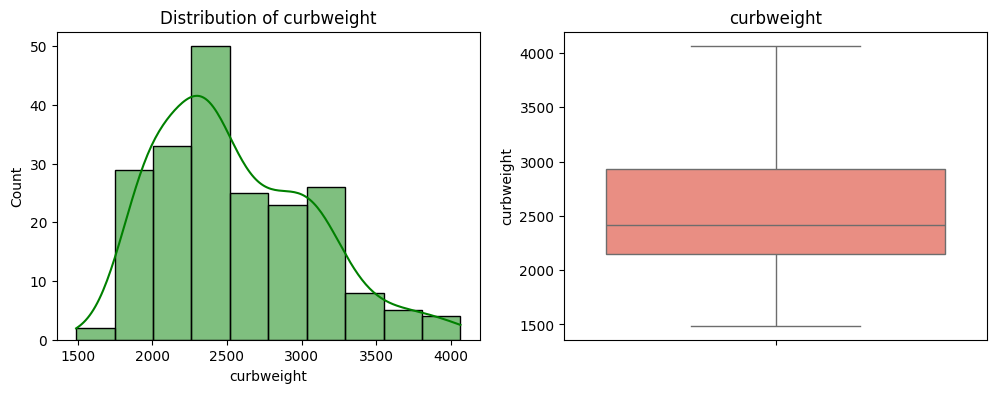

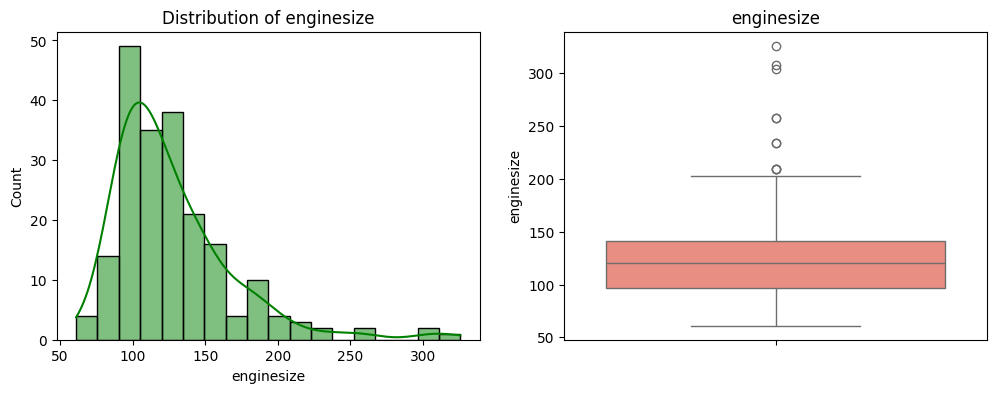

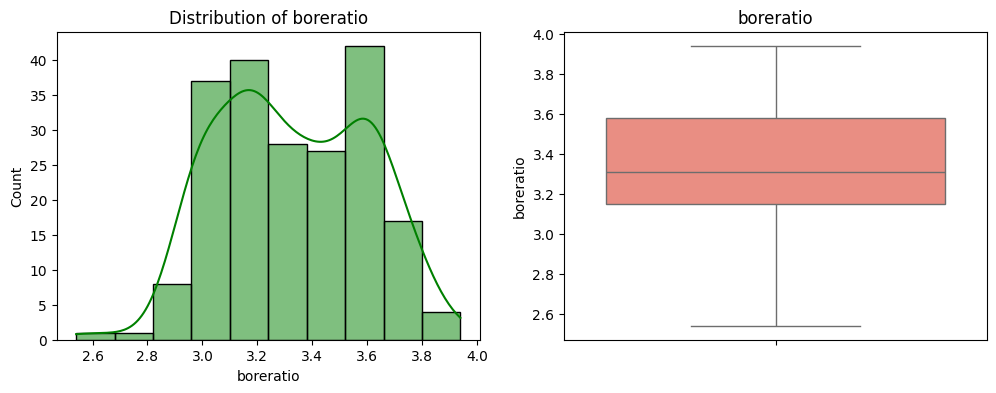

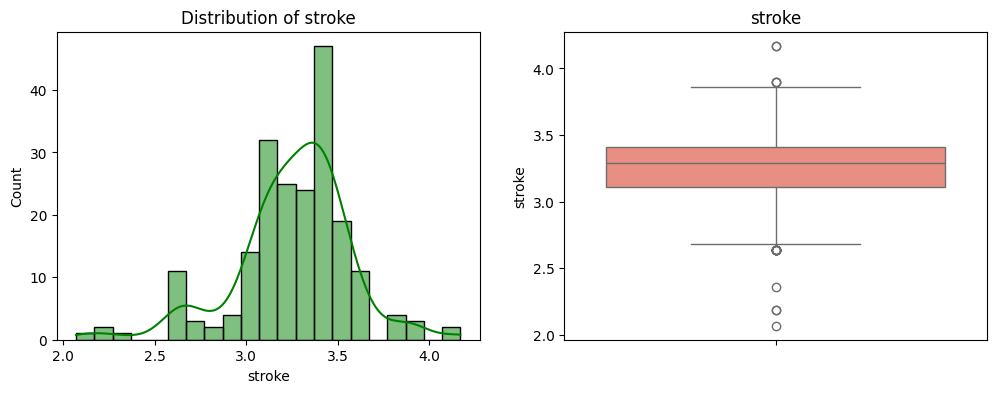

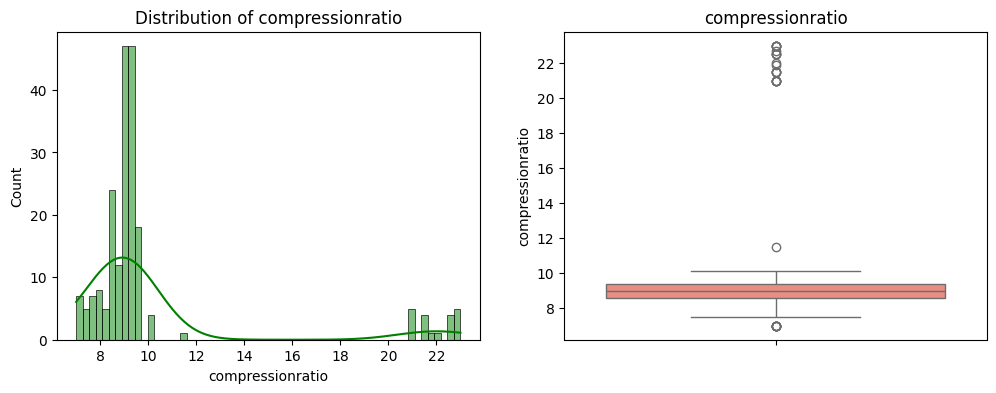

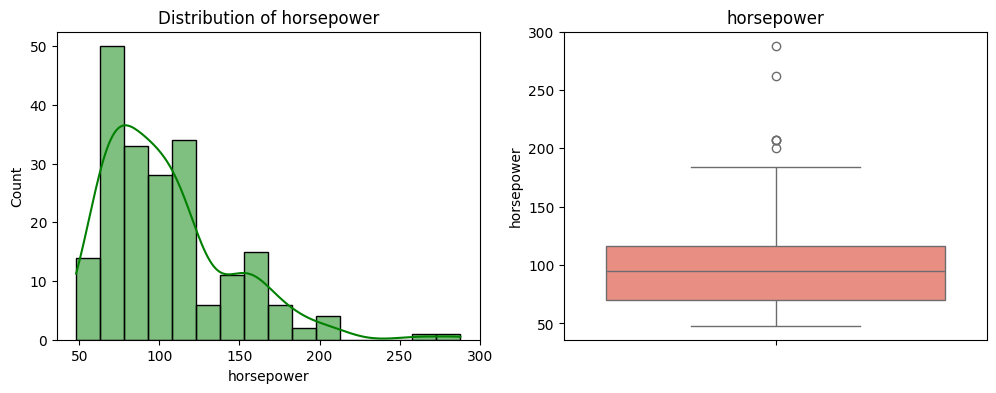

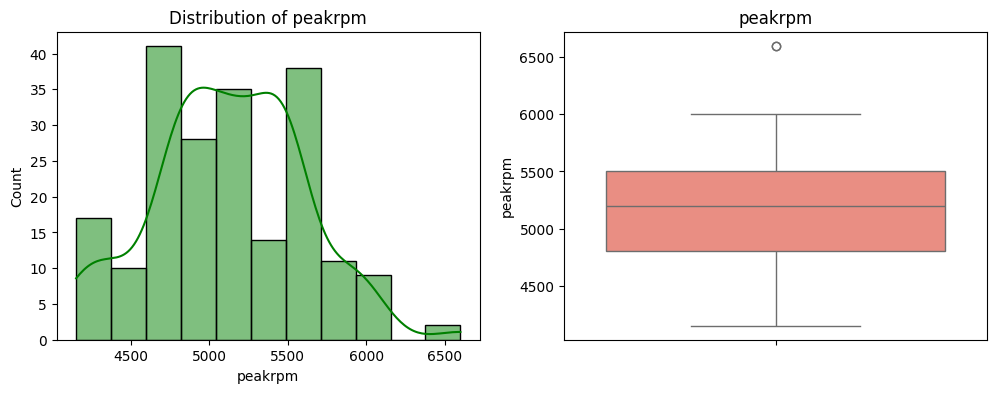

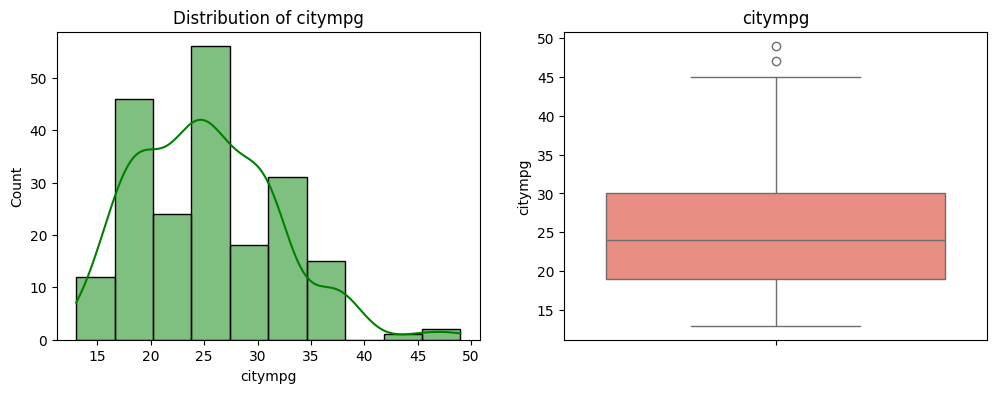

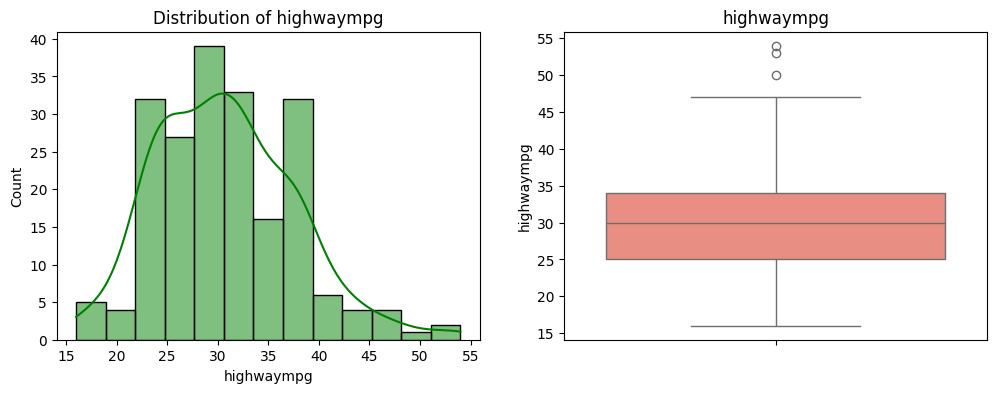

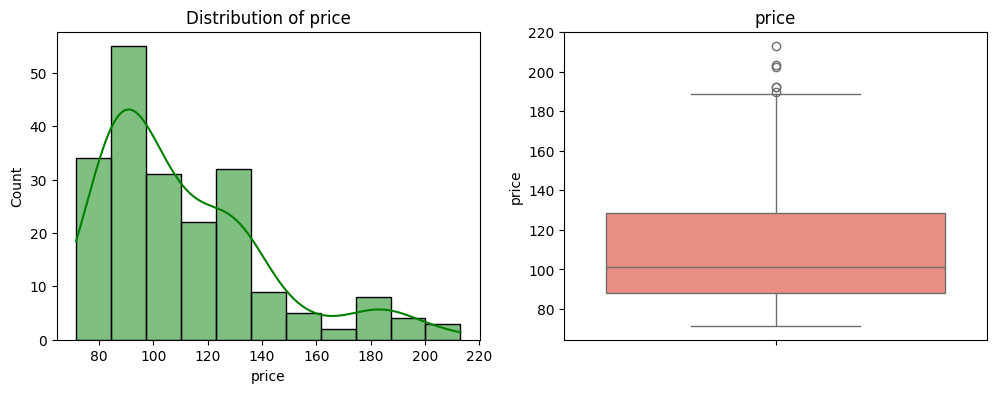

In [43]:
for feature in numerical_features:
    visualize_numerical(df, feature)

## Detecting and treating outliers(IQR)

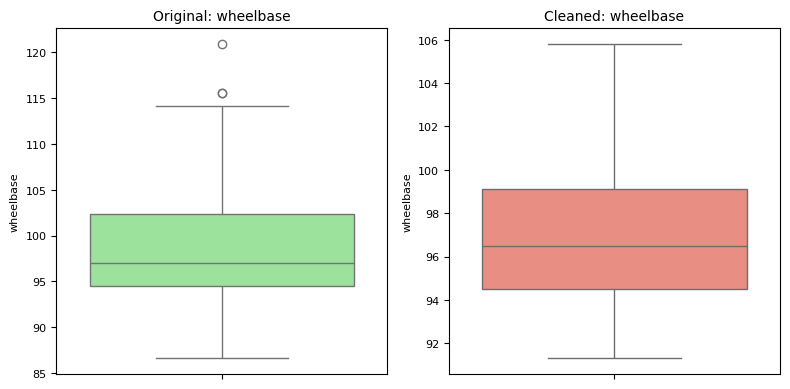

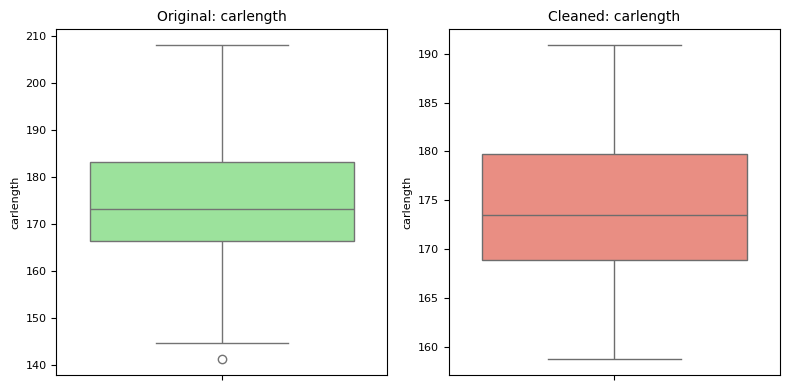

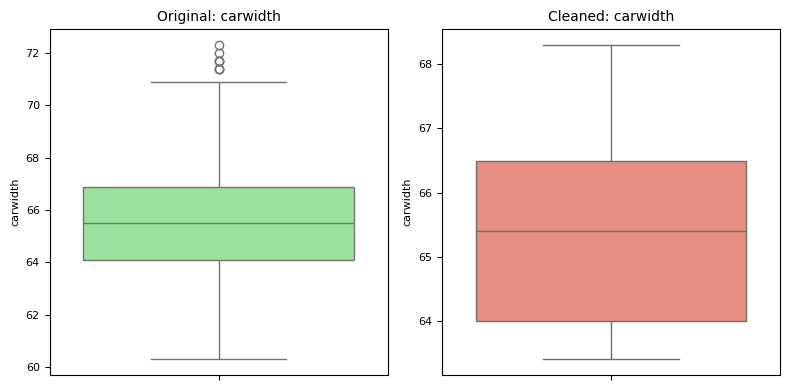

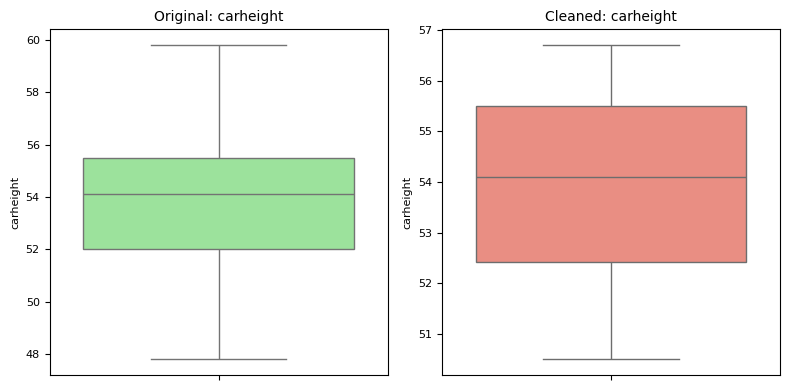

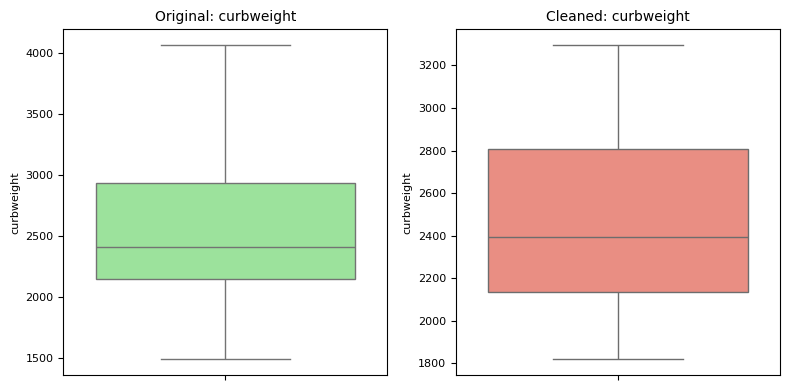

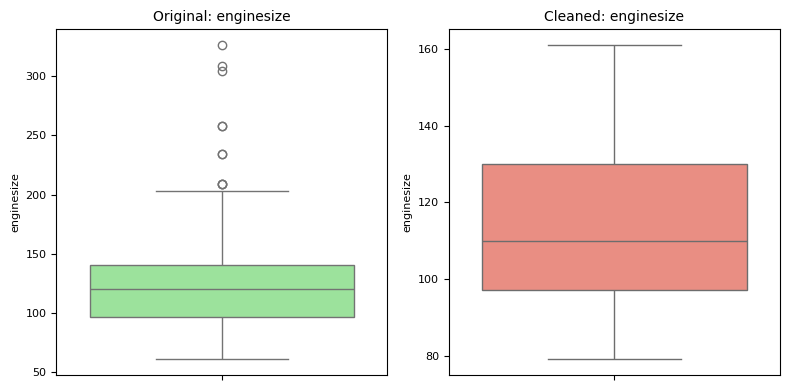

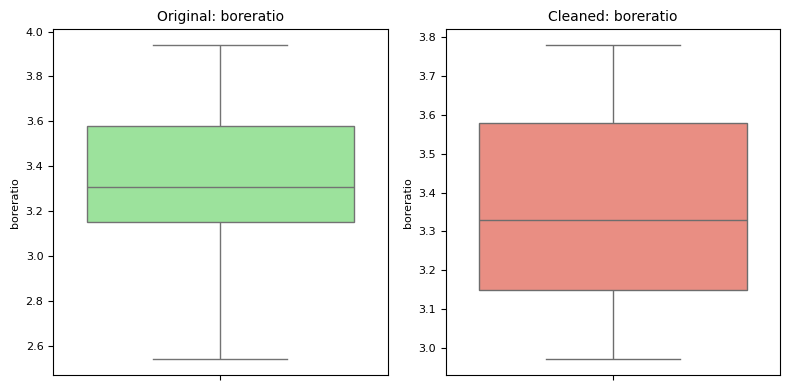

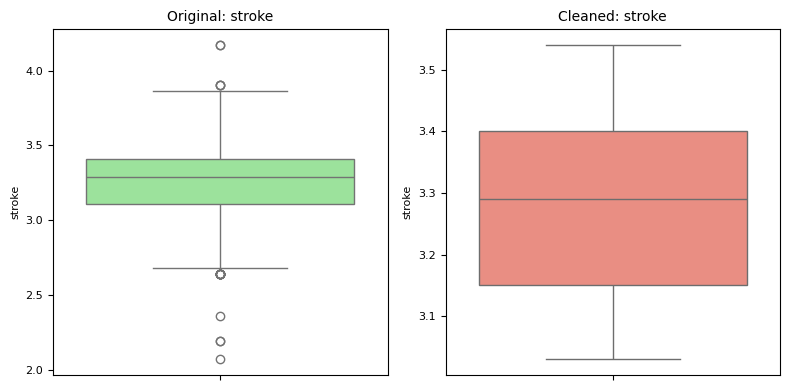

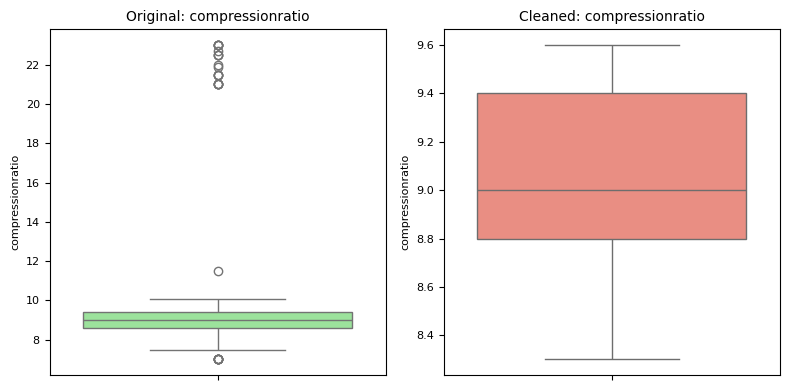

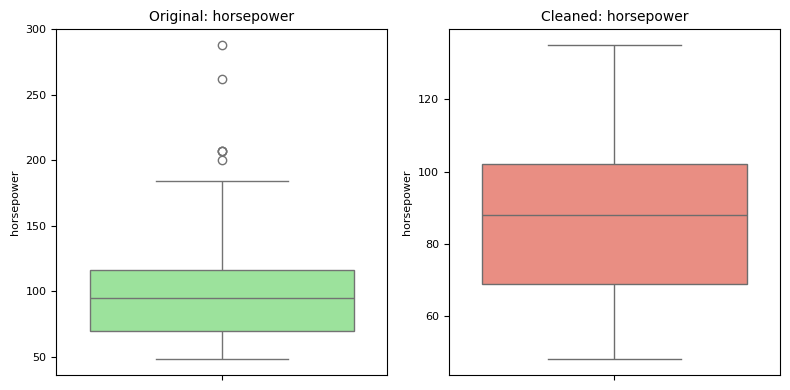

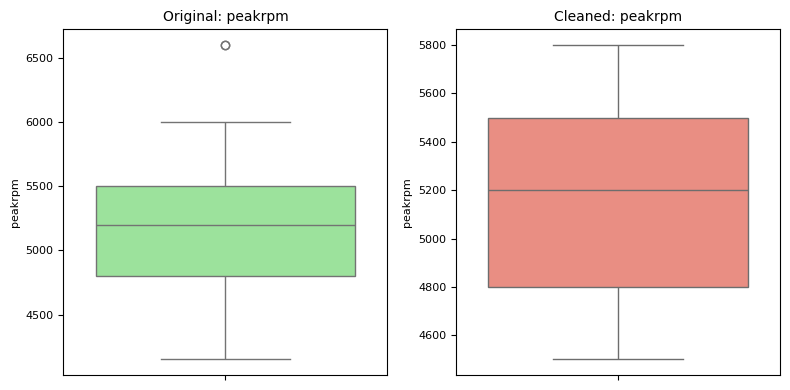

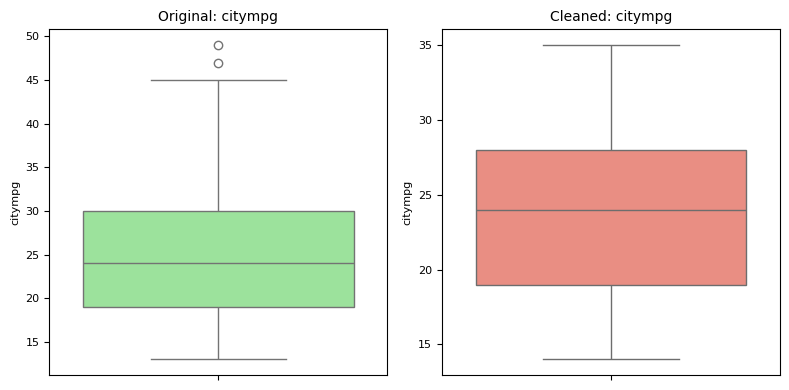

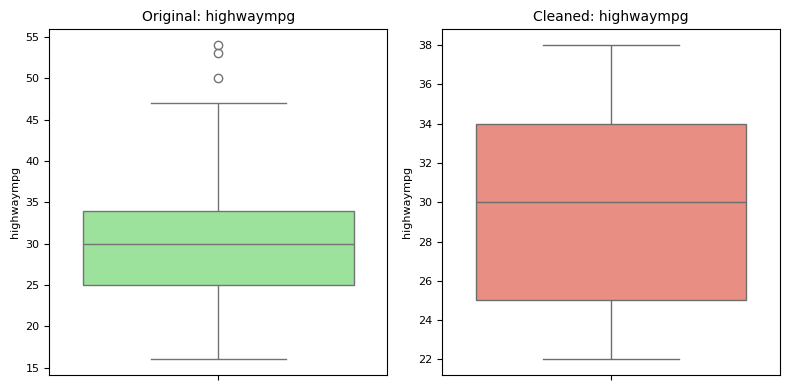

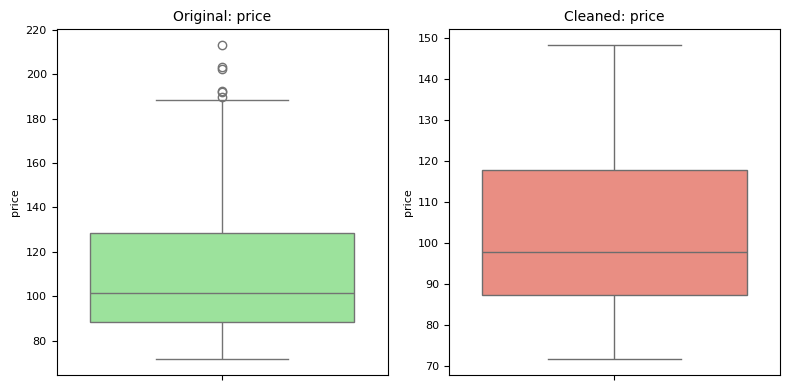

In [44]:
for column in numerical_features:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 0.5*IQR
    upper = Q3 + 0.5*IQR
    data_cleaned = df[(df[column] >= lower) & (df[column] <= upper)]

    # Create a box plot for the original data
    plt.figure(figsize=(8, 4))  # Smaller figure size
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[column], color='lightgreen')
    plt.title(f'Original: {column}', fontsize=10)  # Smaller title font
    plt.ylabel(column, fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Create a box plot for the cleaned data
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data_cleaned[column], color='salmon')
    plt.title(f'Cleaned: {column}', fontsize=10)  # Smaller title font
    plt.ylabel(column, fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Show plots
    plt.tight_layout()
    plt.show()

In [45]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Display the resulting DataFrame
numeric_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,116.167982
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,128.452326
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,128.452326
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,118.110118
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,132.098448


In [46]:
# Calculate skewness for each numeric column
skewness = df[numerical_features].skew().sort_values(ascending=True)
skewness

stroke             -0.689705
boreratio           0.020156
carheight           0.063123
peakrpm             0.075159
carlength           0.155954
highwaympg          0.539997
citympg             0.663704
curbweight          0.681398
carwidth            0.904003
wheelbase           1.050214
price               1.204620
horsepower          1.405310
enginesize          1.947655
compressionratio    2.610862
dtype: float64

In [47]:
# Highlight the features with high skewness (greater than 0.5 or less than -0.5)
highly_skewed = skewness[(skewness > 0.5) | (skewness < -0.5)]
print("\nHighly skewed features:")
print(highly_skewed)
print(len(highly_skewed))


Highly skewed features:
stroke             -0.689705
highwaympg          0.539997
citympg             0.663704
curbweight          0.681398
carwidth            0.904003
wheelbase           1.050214
price               1.204620
horsepower          1.405310
enginesize          1.947655
compressionratio    2.610862
dtype: float64
10


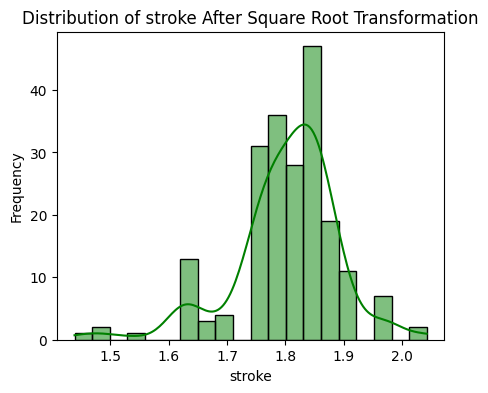

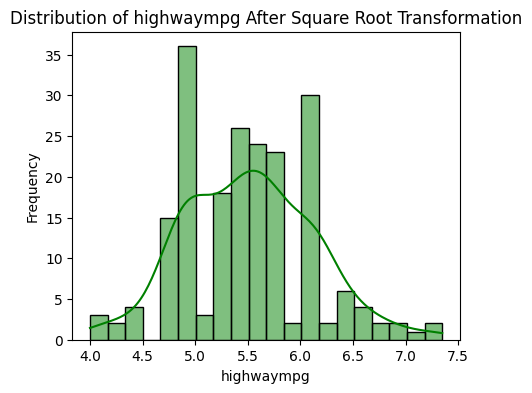

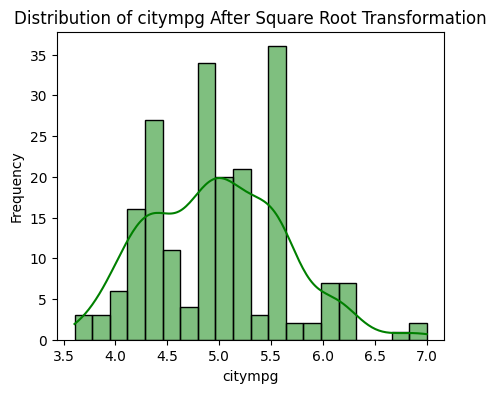

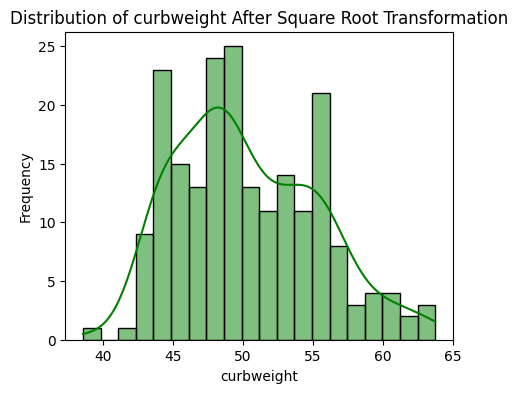

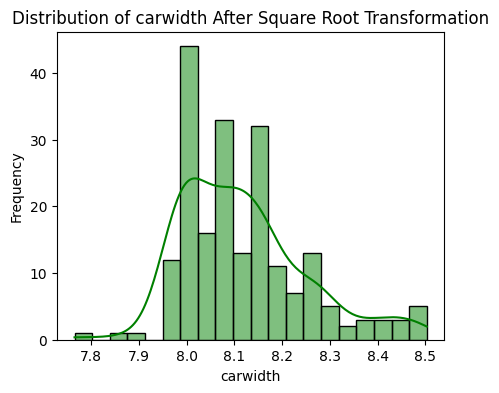

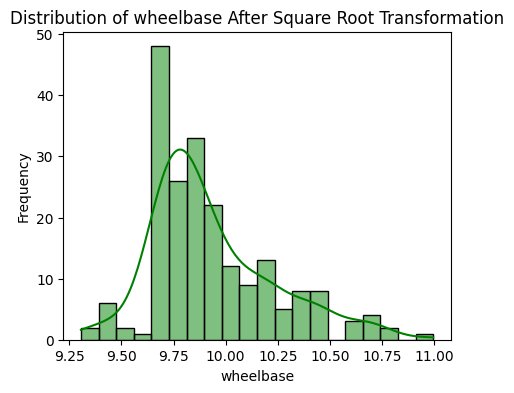

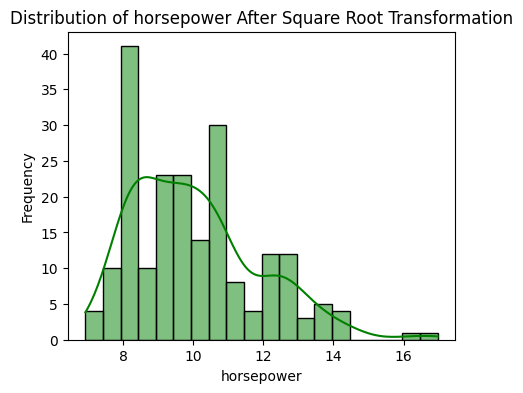

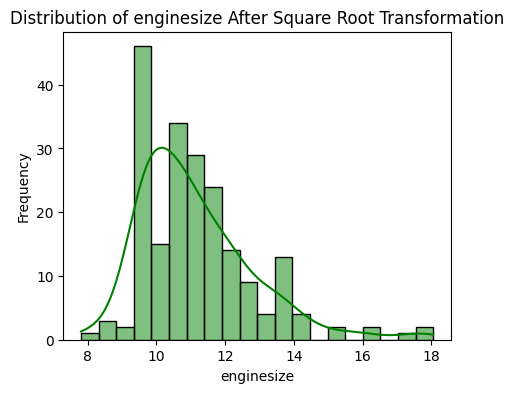

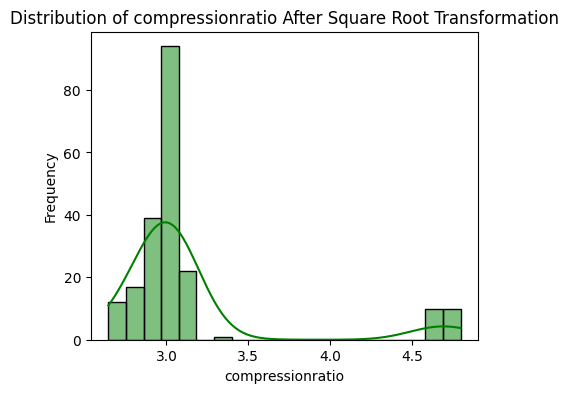

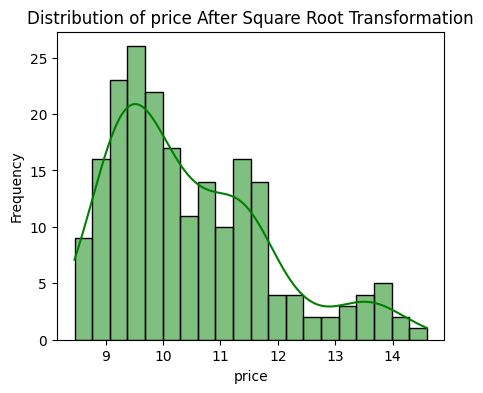

In [48]:
# Copy of the original dataframe to avoid modifying it in place
df_transformed = df.copy()

# Define the columns to transform (example, replace with actual columns)
cols_to_transform = ['stroke', 'highwaympg', 'citympg', 'curbweight', 'carwidth', 'wheelbase', 'horsepower','enginesize', 'compressionratio','price'] 

# Apply Square Root transformation on specific columns
for col in cols_to_transform:
    # Apply square root transformation only to positive values
    df_transformed[col] = np.sqrt(np.abs(df_transformed[col]))

# Plot the histograms after square root transformation
for col in cols_to_transform:
    plt.figure(figsize=(5, 4))

    # Plot the histogram after transformation
    sns.histplot(df_transformed[col], kde=True, color='green', bins=20)
    plt.title(f'Distribution of {col} After Square Root Transformation')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

In [49]:
df_transformed.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make
0,3,gas,std,two,convertible,rwd,front,9.412757,168.8,8.006248,...,mpfi,3.47,1.637071,3.000000,10.535654,5000,4.582576,5.196152,10.778125,alfa-romero
1,3,gas,std,two,convertible,rwd,front,9.412757,168.8,8.006248,...,mpfi,3.47,1.637071,3.000000,10.535654,5000,4.582576,5.196152,11.333681,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,9.721111,171.2,8.093207,...,mpfi,2.68,1.862794,3.000000,12.409674,5000,4.358899,5.099020,11.333681,alfa-romero
3,2,gas,std,four,sedan,fwd,front,9.989995,176.6,8.136338,...,mpfi,3.19,1.843909,3.162278,10.099505,5500,4.898979,5.477226,10.867848,audi
4,2,gas,std,four,sedan,4wd,front,9.969955,176.6,8.148620,...,mpfi,3.19,1.843909,2.828427,10.723805,5500,4.242641,4.690416,11.493409,audi


## Encoding Categorical Columns (OHE)

In [50]:
categorical_features

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'make']

In [51]:
categorical_features = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel','enginelocation', 'enginetype', 
                        'cylindernumber','fuelsystem', 'make']

In [52]:
df_encoded = pd.get_dummies(df_transformed, columns=categorical_features, drop_first=True)

In [53]:
df_encoded.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,make_nissan,make_peugeot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,9.412757,168.8,8.006248,48.8,50.477718,11.401754,3.47,1.637071,3.000000,10.535654,...,False,False,False,False,False,False,False,False,False,False
1,9.412757,168.8,8.006248,48.8,50.477718,11.401754,3.47,1.637071,3.000000,10.535654,...,False,False,False,False,False,False,False,False,False,False
2,9.721111,171.2,8.093207,52.4,53.131911,12.328828,2.68,1.862794,3.000000,12.409674,...,False,False,False,False,False,False,False,False,False,False
3,9.989995,176.6,8.136338,54.3,48.342528,10.440307,3.19,1.843909,3.162278,10.099505,...,False,False,False,False,False,False,False,False,False,False
4,9.969955,176.6,8.148620,54.3,53.141321,11.661904,3.19,1.843909,2.828427,10.723805,...,False,False,False,False,False,False,False,False,False,False


In [54]:
df_encoded.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'make_audi', 'make_bmw',
       'make_buick', 'make_chevrolet', 'make_dodge', 'make

In [55]:
df_encoded.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,make_nissan,make_peugeot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,9.412757,168.8,8.006248,48.8,50.477718,11.401754,3.47,1.637071,3.000000,10.535654,...,False,False,False,False,False,False,False,False,False,False
1,9.412757,168.8,8.006248,48.8,50.477718,11.401754,3.47,1.637071,3.000000,10.535654,...,False,False,False,False,False,False,False,False,False,False
2,9.721111,171.2,8.093207,52.4,53.131911,12.328828,2.68,1.862794,3.000000,12.409674,...,False,False,False,False,False,False,False,False,False,False
3,9.989995,176.6,8.136338,54.3,48.342528,10.440307,3.19,1.843909,3.162278,10.099505,...,False,False,False,False,False,False,False,False,False,False
4,9.969955,176.6,8.148620,54.3,53.141321,11.661904,3.19,1.843909,2.828427,10.723805,...,False,False,False,False,False,False,False,False,False,False


In [56]:
print(df_encoded['price'].dtype)

float64


In [57]:
df_transformed.shape

(205, 25)

In [58]:
df_encoded.shape

(205, 69)

In [59]:
df_transformed.head(1)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make
0,3,gas,std,two,convertible,rwd,front,9.412757,168.8,8.006248,...,mpfi,3.47,1.637071,3.0,10.535654,5000,4.582576,5.196152,10.778125,alfa-romero


In [60]:
# df_encoded = df_encoded.replace({False:0, True:1})
pd.set_option('future.no_silent_downcasting', True)
df_encoded = df_encoded.replace({False: 0, True: 1})

In [61]:
df_encoded.head(1)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,make_nissan,make_peugeot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,9.412757,168.8,8.006248,48.8,50.477718,11.401754,3.47,1.637071,3.0,10.535654,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df_encoded.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'make_audi', 'make_bmw',
       'make_buick', 'make_chevrolet', 'make_dodge', 'make

___________
# Scaling Features
_________________

In [63]:
X = df_encoded.drop('price', axis=1) #features
y = df_encoded['price'] #target

In [64]:
# Identify numerical columns excluding 'price'
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [65]:
X_scaled = X.copy()

In [66]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled[numerical_features] = scaler.fit_transform(X_scaled[numerical_features])

In [67]:
#Convert back to DataFrame with the same column names
df_scaled = pd.DataFrame(X_scaled, columns=df_encoded.columns)

In [68]:
X.head(1)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,make_nissan,make_peugeot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,9.412757,168.8,8.006248,48.8,50.477718,11.401754,3.47,1.637071,3.0,10.535654,...,0,0,0,0,0,0,0,0,0,0


In [69]:
X_scaled.head(1)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,make_nissan,make_peugeot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,-1.095242,-0.261905,-0.502672,-1.514286,0.171118,0.220838,0.372093,-2.127155,0.0,0.328181,...,0,0,0,0,0,0,0,0,0,0


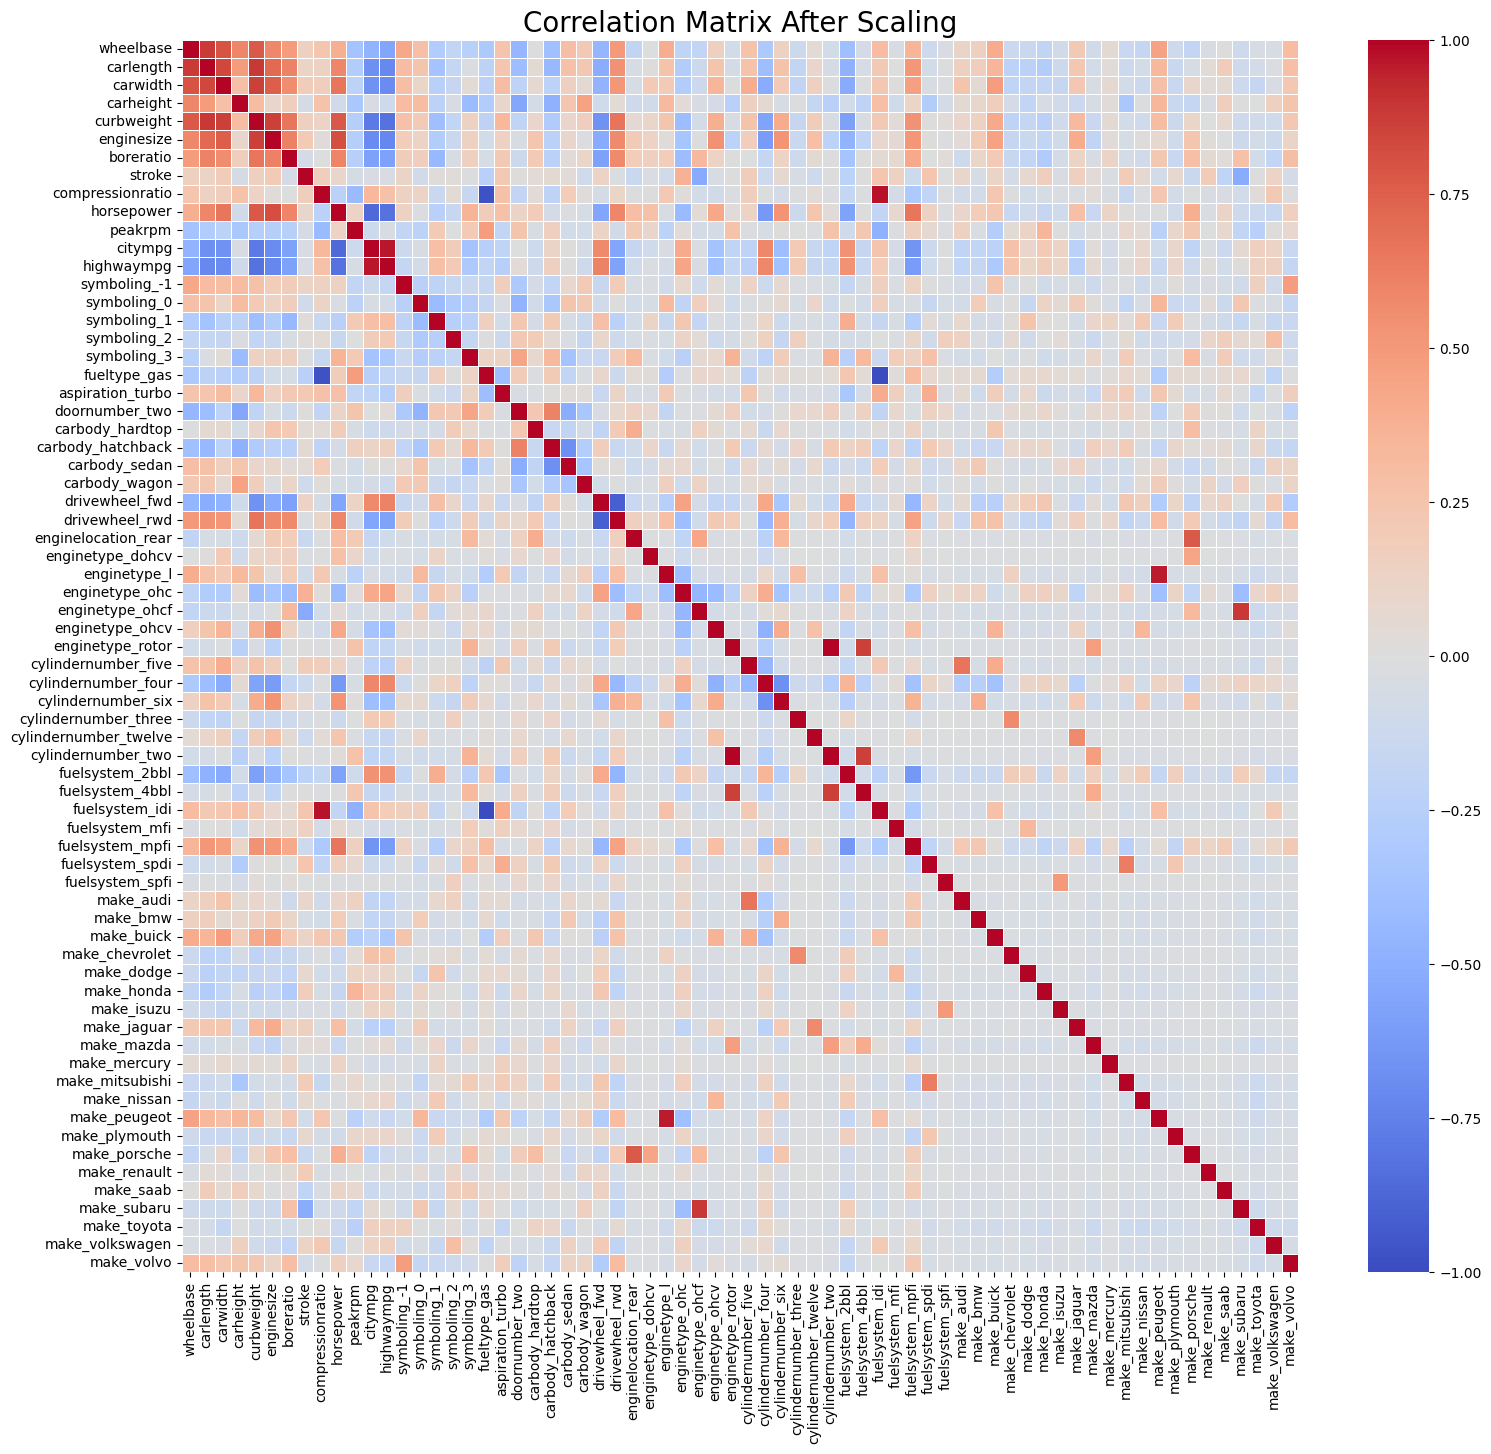

In [70]:
# Calculate the correlation matrix after scaling
correlation_matrix_scaled = X_scaled.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix_scaled, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix After Scaling', fontsize=20)
plt.show()

In [71]:
high_corr = correlation_matrix_scaled[(correlation_matrix_scaled > 0.9) & (correlation_matrix_scaled < 1.0)].round(2)


rows, cols = high_corr.stack().index.to_frame(index=False).T.values

# Combine the rows, columns, and values into a DataFrame for better display
extracted_data_frame = pd.DataFrame({
    'Row': rows,
    'Column': cols,
    'Value': high_corr.stack().values
})

In [72]:
extracted_data_frame

,Row,Column,Value
0,compressionratio,fuelsystem_idi,0.98
1,citympg,highwaympg,0.97
2,highwaympg,citympg,0.97
3,enginetype_l,make_peugeot,0.95
4,fuelsystem_idi,compressionratio,0.98
5,make_peugeot,enginetype_l,0.95


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=42)

In [74]:
X_train.shape

(163, 68)

In [75]:
X_test.shape

(42, 68)

In [76]:
y_train.shape

(163,)

In [77]:
y_test.shape

(42,)

In [81]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=15)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
X_RFE=X_train[selected_features] 
print(selected_features)


Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fuelsystem_mpfi', 'make_bmw'],
      dtype='object')


In [82]:
RFE_corr = pd.merge(X_test[selected_features], df_encoded[['price']], left_index=True, right_index=True).corr()

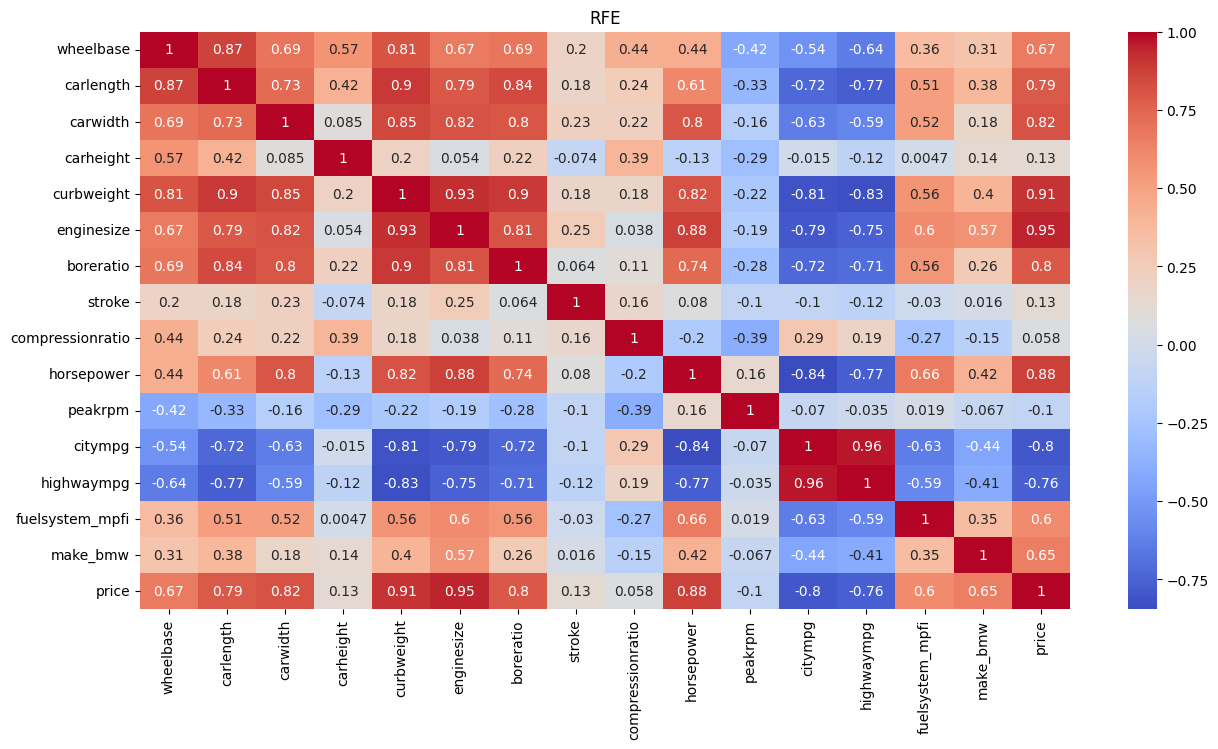

In [83]:
plt.figure(figsize=(15, 7.5))
sns.heatmap(RFE_corr, annot=True, cmap='coolwarm')
plt.title('RFE')
plt.show()


In [84]:
X_train_final = X_RFE.copy()

In [85]:
X_train_final.shape

(163, 15)

In [86]:
X_test_final = X_test[selected_features]

In [87]:
X_test_final.shape

(42, 15)

# MODEL IMPLEMENTATION

In [88]:
lr = LinearRegression()
lr

LinearRegression()

In [89]:
dt = DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [90]:
rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [91]:
gbr = GradientBoostingRegressor()
gbr

GradientBoostingRegressor()

In [92]:
svr = SVR()
svr

SVR()

# MODEL EVALUATION

In [93]:
models=[lr, dt, rf, gbr, svr]

In [94]:
model_names = {}
r2_scores = {}
mse_train = {}
mse_test = {}
mae_train = {}
mae_test = {}

for model in models:
    model_names[model] = model.__class__.__name__
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)
    r2_scores[model] = r2_score(y_test, y_pred)
    mse_train[model] = mean_squared_error(y_train, model.predict(X_train_final)) 
    mse_test[model] = mean_squared_error(y_test, y_pred)
    mae_train[model] = mean_absolute_error(y_train, model.predict(X_train_final)) 
    mae_test[model] = mean_absolute_error(y_test, y_pred)

In [95]:
df_model_scores = pd.DataFrame({
    'Model': model_names.values(),
    'R2 Score': r2_scores.values(),
    'MSE - Train': mse_train.values(),
    'MSE - Test': mse_test.values(),
    'MAE - Train': mae_train.values(),
    'MAE - Test': mae_test.values()
})

In [96]:
df_model_scores

,Model,R2 Score,MSE - Train,MSE - Test,MAE - Train,MAE - Test
0,LinearRegression,0.931519,0.207208,0.120582,0.367701,0.263370
1,DecisionTreeRegressor,0.927657,0.002767,0.127381,0.013709,0.258145
2,RandomForestRegressor,0.957305,0.023599,0.075177,0.117630,0.203726
3,GradientBoostingRegressor,0.941430,0.020703,0.103130,0.110388,0.238299
4,SVR,0.911877,0.180995,0.155167,0.323760,0.299693


### Predicted vs Real Values

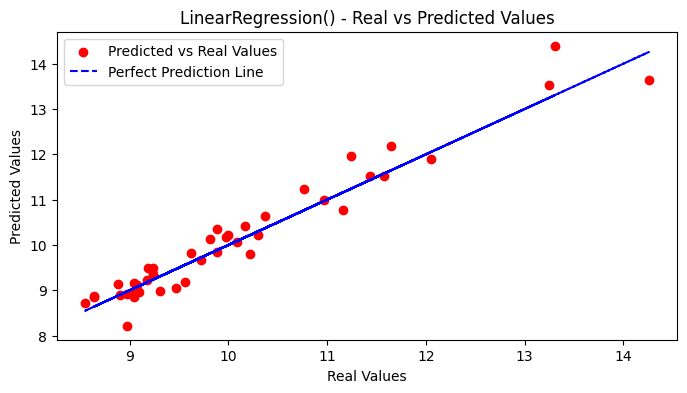

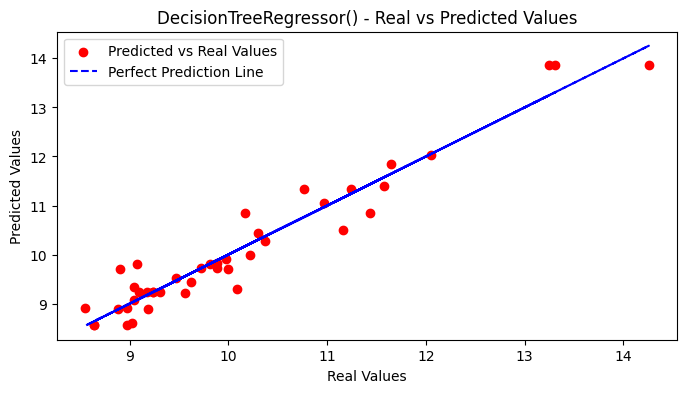

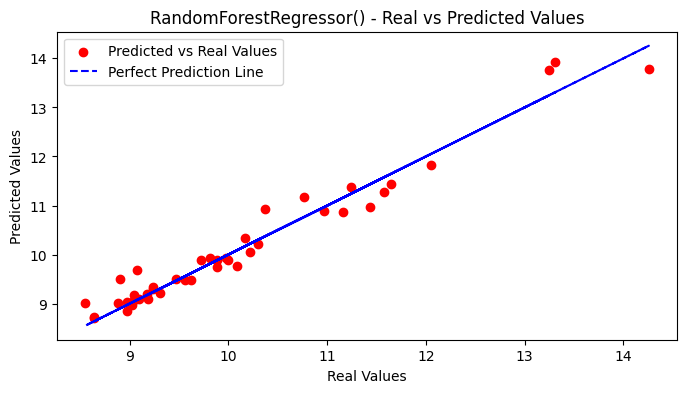

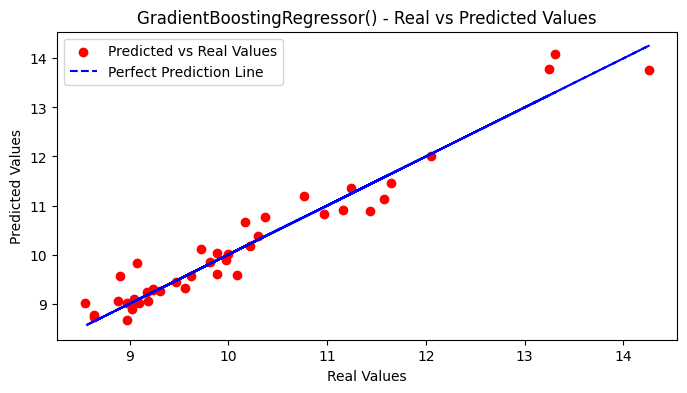

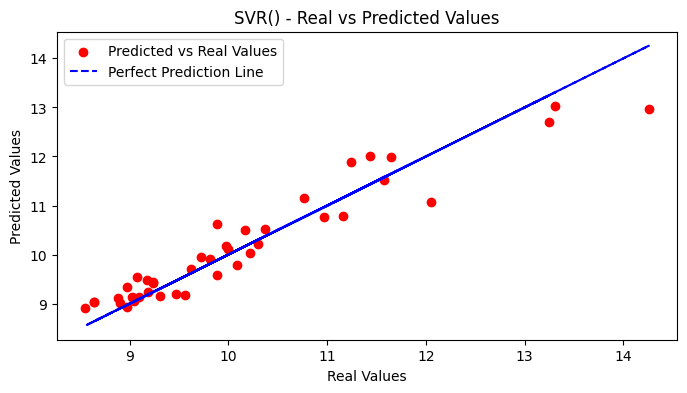

In [97]:
for model in models:
    y_pred = model.predict(X_test_final)

    #real values vs predicted values
    plt.figure(figsize=(8, 4))
    plt.scatter(y_test, y_pred, color='red', label='Predicted vs Real Values')
    plt.plot(y_test, y_test, color='blue', linestyle='--', label='Perfect Prediction Line')
    plt.title(f'{model} - Real vs Predicted Values')
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

In [98]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model in models:
    scores = cross_val_score(model, X_scaled[selected_features], y, cv=kf, scoring='neg_mean_squared_error')
    print(f'{model.__class__.__name__}: Mean MSE = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}')

LinearRegression: Mean MSE = -0.2440, Std = 0.0290
DecisionTreeRegressor: Mean MSE = -0.2134, Std = 0.0350
RandomForestRegressor: Mean MSE = -0.1489, Std = 0.0367
GradientBoostingRegressor: Mean MSE = -0.1549, Std = 0.0226
SVR: Mean MSE = -0.2878, Std = 0.0504


# Hyperparameter Tuning

In [99]:
models_and_params = {
    'LinearRegression': (LinearRegression(), {}),
    
    'DecisionTreeRegressor': (
        DecisionTreeRegressor(),
        {
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    ),
    
    'RandomForestRegressor': (
        RandomForestRegressor(),
        {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2, 4]
        }
    ),
    
    'GradientBoostingRegressor': (
        GradientBoostingRegressor(),
        {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2, 4]
        }
    ),
    
    'SVR': (
        SVR(),
        {
            'kernel': ['linear', 'rbf', 'poly'],
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        }
    )
}


results = {}

#hyperparameter tuning
for model_name, (model, params) in models_and_params.items():
    print(f"Tuning hyperparameters for {model_name}...")
    
    if model_name == 'LinearRegression':
        model.fit(X_train_final, y_train)
        y_pred = model.predict(X_test_final)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        best_params = {}
    else:
        grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train_final, y_train)
        
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        
        y_pred = best_model.predict(X_test_final)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {'Best Params': best_params,
                           'MSE': mse,
                           'R2': r2}


resultss = pd.DataFrame(results).T
print("\nHyperparameter tuning results:")
resultss

Tuning hyperparameters for LinearRegression...
Tuning hyperparameters for DecisionTreeRegressor...
Tuning hyperparameters for RandomForestRegressor...
Tuning hyperparameters for GradientBoostingRegressor...
Tuning hyperparameters for SVR...

Hyperparameter tuning results:


,Best Params,MSE,R2
LinearRegression,{},0.120582,0.931519
DecisionTreeRegressor,"{'max_depth': 15, 'min_samples_leaf': 4, 'min_...",0.144273,0.918064
RandomForestRegressor,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.07197,0.959127
GradientBoostingRegressor,"{'learning_rate': 0.2, 'max_depth': 3, 'min_sa...",0.107311,0.939055
SVR,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.105181,0.940265


In [100]:
df_model_scores.round(6)

,Model,R2 Score,MSE - Train,MSE - Test,MAE - Train,MAE - Test
0,LinearRegression,0.931519,0.207208,0.120582,0.367701,0.263370
1,DecisionTreeRegressor,0.927657,0.002767,0.127381,0.013709,0.258145
2,RandomForestRegressor,0.957305,0.023599,0.075177,0.117630,0.203726
3,GradientBoostingRegressor,0.941430,0.020703,0.103130,0.110388,0.238299
4,SVR,0.911877,0.180995,0.155167,0.323760,0.299693


___________
## Insights:
* **Best Model:** **Random Forest Regressor** has the best performance with the **lowest MSE (0.0719) and highest R² (0.9591)**, indicating it explains about 96% of the variance in car prices and has minimal prediction errors.

* **Gradient Boosting:** Gradient Boosting also performs well but slightly underperforms Random Forest. It is a close competitor when interpretability and less bias are prioritized.

* **Linear Regression:** Linear Regression is the weakest, likely due to its assumption of a linear relationship that doesn't capture the underlying complexity in car pricing.

* **Hyperparameter Tuning Impact:** Models like Decision Trees, Random Forest, Gradient Boosting, and SVR benefited significantly from hyperparameter tuning, improving their performance and generalization.
__________

In [102]:
feature_coeffs = pd.DataFrame({
    'feature': X_train_final.columns,
    'coeff': lr.coef_
})

# Sort and display the top 10 features with the highest positive coefficients
top_positive_features = feature_coeffs.sort_values(by='coeff', ascending=False).head(10)
print("Top 10 features with the highest positive coefficients:")
top_positive_features

Top 10 features with the highest positive coefficients:


,feature,coeff
14,make_bmw,1.060161
4,curbweight,0.587942
5,enginesize,0.454778
9,horsepower,0.426473
2,carwidth,0.363988
10,peakrpm,0.252750
12,highwaympg,0.230208
13,fuelsystem_mpfi,0.104713
0,wheelbase,0.097784
8,compressionratio,0.070979


_____________
## Insights:

* **Car Brands (make_bmw, make_isuzu):**
    + ***make_bmw*** has the highest positive coefficient, indicating that ***BMW cars*** are priced significantly higher than other car brands in the dataset. The positive coefficient value suggests that luxury brands like ***BMW are positively associated with high car prices***.
***make_isuzu*** also has a significant ***positive coefficient***, which may reflect the brand's positioning in the market and its association with higher-value vehicles.


* **Physical Characteristics:**
    + curbweight and enginesize are among the top features contributing to the price. Heavier and more powerful cars (larger engines) are typically more expensive.
  
    + horsepower is also a significant factor, highlighting the impact of engine performance on price.

  
### Other Features:

* **carwidth:** Wider cars generally tend to be more expensive, reflecting their luxury or premium design.
  
* **highwaympg:** The miles per gallon on highways has a positive relationship with price, which may indicate that cars with better fuel efficiency tend to be priced higher.

  
### Vehicle Dimensions:

* **wheelbase** (distance between the front and rear axles) is also positively correlated with car price. Larger wheelbases typically signify larger vehicles, which may command higher prices.
  
* **peakrpm:** Higher engine revolutions per minute (RPM) can indicate better engine performance, which may increase the car's price.

  
* **Compression Ratio:** compressionratio has the smallest positive coefficient, indicating that it has a relatively minor but still positive effect on price. Compression ratio is related to engine efficiency and performance.

______________

# Conclusion:
___________

* ***Premium Brands and Larger Cars:*** Features such as make_bmw, curbweight, and enginesize are highly influential in determining car prices. Premium brands
and larger, more powerful cars tend to have higher prices.
    
* ***Fuel Efficiency and Design:*** Features like highwaympg and carwidth also play a role, though their impact is less significant compared to engine-related factors.

* ***Performance Metrics:*** Engine-related factors such as horsepower and peakrpm indicate that higher performance contributes positively to car prices.
_________

# Market Insights:
    In the current US automotive market, certain car features are highly popular and represent key consumer preferences. The following features are commonly associated with vehicles in demand:

* **Insurance Risk Rating:** Most vehicles have a risk rating of 0 or 1, indicating moderate to low insurance costs, which is attractive to a broad consumer base.

* **Fuel Type:** Gas-powered cars continue to dominate the market due to their affordability, accessibility, and well-established infrastructure.

* **Body Type:** Hatchbacks and sedans remain popular choices for their versatility, fuel efficiency, and practicality.

* **Number of Cylinders:** Vehicles with 4-cylinder engines are favored for their balance of power and fuel economy, appealing to a wide range of consumers.

* **Valve Mechanism:** OHC (Overhead Cam) engines are commonly used, known for their efficiency and performance.

________

### Strategic Recommendations for High-End Launch:

* To appeal to the high-end market, the company should focus on creating cars that are spacious, well-built, and offer luxury features and strong performance. Cars with larger body types, such as sedans, that offer more space and comfort will attract buyers looking for a premium experience. Additionally, cars with powerful engines (e.g., more cylinders or turbocharged engines) and modern technology will appeal to consumers seeking both comfort and performance.

* Offering cars with low insurance costs and high safety ratings will make these models more attractive to wealthy buyers.

* By focusing on these factors, the company can create cars that not only meet the practical needs of high-end consumers but also align with their desires for luxury, power, and reliability, helping the company stand out in the competitive market.

________